<a href="https://colab.research.google.com/github/Sebastiao199/Project5TimeSeries/blob/main/TimeSeries_Rent_Index_SF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pandas import Series, DataFrame
from statsmodels.tsa.stattools import kpss
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api

import plotly.express as px


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pandas import Series, DataFrame
from statsmodels.tsa.stattools import kpss
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api
import datetime
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project5TimeSeries/main/rent_index_sf.csv')

In [ ]:
df

,Unnamed: 0,Rent Index
0,2015-03-31,2411.441275
1,2015-04-30,2436.507086
2,2015-05-31,2465.454228
3,2015-06-30,2495.946833
4,2015-07-31,2527.277444
...,...,...
88,2022-07-31,3166.525685
89,2022-08-31,3176.060028
90,2022-09-30,3172.722698
91,2022-10-31,3160.365782


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  93 non-null     object 
 1   Rent Index  91 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
df.isna().sum()

Unnamed: 0    0
Rent Index    2
dtype: int64

In [ ]:
df

,Unnamed: 0,Rent Index
0,2015-03-31,2411.441275
1,2015-04-30,2436.507086
2,2015-05-31,2465.454228
3,2015-06-30,2495.946833
4,2015-07-31,2527.277444
...,...,...
88,2022-07-31,3166.525685
89,2022-08-31,3176.060028
90,2022-09-30,3172.722698
91,2022-10-31,3160.365782


In [ ]:
df.rename(columns={'Unnamed: 0': 'DATE', 'Rent Index' : 'Rent_Index'},
          inplace=True, errors='raise')

In [ ]:
df

,DATE,Rent_Index
0,2015-03-31,2411.441275
1,2015-04-30,2436.507086
2,2015-05-31,2465.454228
3,2015-06-30,2495.946833
4,2015-07-31,2527.277444
...,...,...
88,2022-07-31,3166.525685
89,2022-08-31,3176.060028
90,2022-09-30,3172.722698
91,2022-10-31,3160.365782


In [ ]:
# Convert the date column into a datetime type
df['DATE'] = pd.to_datetime(df["DATE"])

In [ ]:
# Set the date column as an index
#df.set_index('DATE', inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        93 non-null     datetime64[ns]
 1   Rent_Index  91 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.6 KB


In [ ]:
df

,DATE,Rent_Index
0,2015-03-31,2411.441275
1,2015-04-30,2436.507086
2,2015-05-31,2465.454228
3,2015-06-30,2495.946833
4,2015-07-31,2527.277444
...,...,...
88,2022-07-31,3166.525685
89,2022-08-31,3176.060028
90,2022-09-30,3172.722698
91,2022-10-31,3160.365782


In [ ]:
fig = px.line(df, x = df.index, y='Rent_Index')
fig.update_layout({"title": 'Evolution of the Rent index from March 2015 to November 2022',
                   "xaxis": {"title":"Years"},
                   "yaxis": {"title":"Rent index"},
                   "showlegend": False})
#fig.add_annotation(x=1990, y=400,
 #           text="Text annotation with arrow",
  #          showarrow=True,
   #         arrowhead=1)
fig.show()

In [ ]:
df['Rent_Index']

0     2411.441275
1     2436.507086
2     2465.454228
3     2495.946833
4     2527.277444
         ...     
88    3166.525685
89    3176.060028
90    3172.722698
91    3160.365782
92    3137.586626
Name: Rent_Index, Length: 93, dtype: float64

In [ ]:
# Code for the interactive plot of the rent index in San Francisco 

#df['DATE']= pd.to_datetime(df['DATE']).dt.strftime('%Y-%m-%d')
df.sort_values(by='DATE', inplace = True)
df['Rent_Index'] = df['Rent_Index'].interpolate(method='nearest')

trace1 = go.Scatter(x=df['DATE'],
                    y=df['Rent_Index'],
                    mode='lines',
                    line=dict(width=1.5))

frames = [dict(data= [dict(type='scatter',
                           x=df['DATE'][:k+1],
                           y=df['Rent_Index'][:k+1]),
                     ],
               traces= [0, 1, 2, 3],  
              )for k  in  range(1, len(df)-1)]
layout = go.Layout(width=900,
                   height=600,
                   showlegend=False,
                   hovermode='x unified',
                   title=go.layout.Title(text="Evolution of the Rent index in San Francisco from March 2015 to November 2022"),
                   updatemenus=[
                        dict(
                            type='buttons', showactive=False,
                            y=1.05,
                            x=1.15,
                            xanchor='right',
                            yanchor='top',
                            pad=dict(t=0, r=10),
                            buttons=[dict(label='Play',
                            method='animate',
                            args=[None, 
                                  dict(frame=dict(duration=90, 
                                                  redraw=False),
                                                  transition=dict(duration=0),
                                                  fromcurrent=True,
                                                  mode='immediate')]
                            )]
                        ),
                    ]              
                  )
layout.update(xaxis =dict(range=['2015-03-31','2022-11-30'], autorange=False),
              yaxis =dict(range=[2411.441275,3137.586626], autorange=False));
fig = go.Figure(data=[trace1], frames=frames, layout=layout)
fig.show()




# Resample

In [ ]:
df.set_index('DATE', inplace=True)


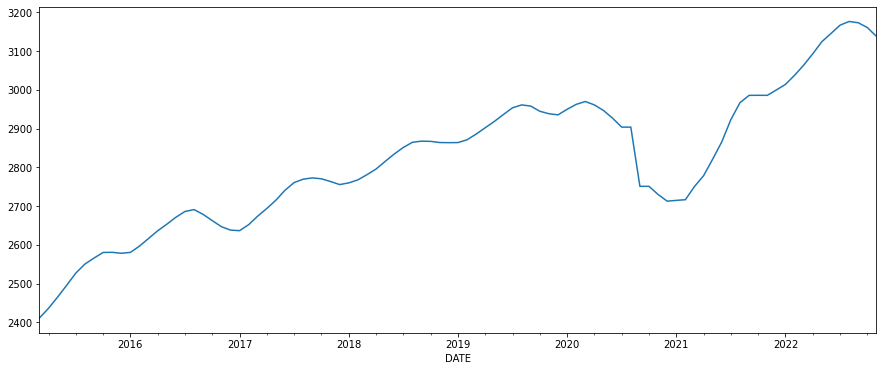

In [ ]:
df['Rent_Index'].resample('M').mean().plot(figsize=(15, 6))
# by year or month is better?

In [ ]:
df['Resample'] = df['Rent_Index'].resample('Y').mean()

In [ ]:
df['Rolling Window'] = df['Rent_Index'].rolling(14).mean() ## Noise filtering
df[['Rent_Index', 'Rolling Window', 'Resample']].head(20)

,Rent_Index,Rolling Window,Resample
DATE,,,
2015-03-31,2411.441275,NaN,NaN
2015-04-30,2436.507086,NaN,NaN
2015-05-31,2465.454228,NaN,NaN
2015-06-30,2495.946833,NaN,NaN
2015-07-31,2527.277444,NaN,NaN
2015-08-31,2550.526312,NaN,NaN
2015-09-30,2565.998722,NaN,NaN
2015-10-31,2580.369338,NaN,NaN
2015-11-30,2580.712621,NaN,NaN


Interpolate

In [ ]:
df['Rent_Index'] = df['Rent_Index'].interpolate(method='nearest')

In [ ]:
df['Rent_Index'].isna().sum()

0

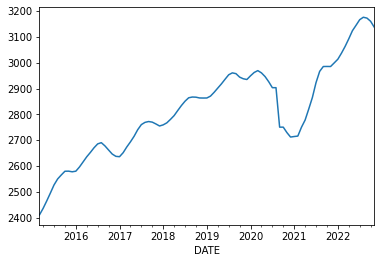

In [ ]:
df['Rent_Index'].plot()

In [ ]:
fig = px.line(df, x = df.index, y='Rent_Index')
fig.update_layout({"title": 'Evolution of the Rent index from March 2015 to November 2022',
                   "xaxis": {"title":"Years"},
                   "yaxis": {"title":"Rent index"},
                   "showlegend": False})
#fig.add_annotation(x=1990, y=400,
 #           text="Text annotation with arrow",
  #          showarrow=True,
   #         arrowhead=1)
fig.show()

# Stationary ?

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of the Dickey-Fuller Test:')

    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','P-Value','Number of Lags Used','Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print (dfoutput)
# The obtained p-value (0.84) is greater than 0.05 indicating that we cannot reject the null hyp. 
# So we failed to demonstrate the time series is non-stat


In [ ]:
adf_test(df['Rent_Index'])

Results of the Dickey-Fuller Test:
Test Statistic                 -1.698822
P-Value                         0.431720
Number of Lags Used             2.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64


In [ ]:
kpss(df['Rent_Index'], regression='c', nlags = 'auto')
# The obtained p-value (0.01) is lower than 0.05 indicating that we can reject the null hyp. So the time series is non-stat.


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




(1.2994081104293251,
 0.01,
 5,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

# Seasonal_decompose

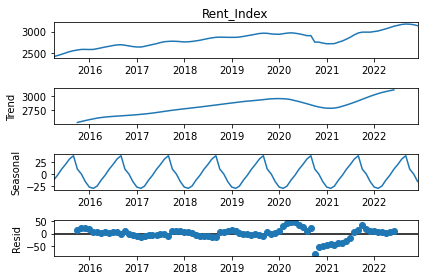

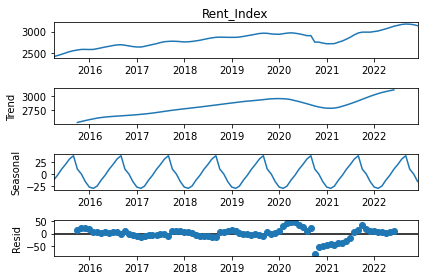

In [ ]:
decomp_series = seasonal_decompose(df['Rent_Index'], model='additive')
decomp_series.plot()

# not seasonality, no residuals?

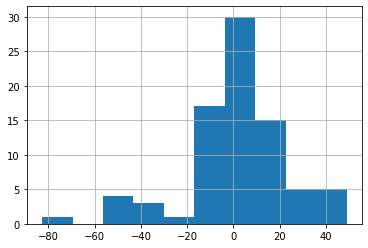

In [ ]:
decomp_series.resid.hist()

# ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
arima_model = ARIMA(df['Rent_Index'], order=(5,1,0))
arima_model_fit = arima_model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



In [ ]:
# summary of fit model
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Rent_Index   No. Observations:                   93
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -404.411
Date:                Thu, 19 Jan 2023   AIC                            820.822
Time:                        09:55:32   BIC                            835.953
Sample:                    03-31-2015   HQIC                           826.929
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3166      0.070      4.533      0.000       0.180       0.454
ar.L2          0.4020      0.076      5.291      0.000       0.253       0.551
ar.L3          0.1009      0.283      0.356      0.722      -0.454       0.656
ar.L4         -0.1494      0.281     -0.532      0.595      -0.699       0.401
ar.L5         -0.0833      0.237     -0.351      0.725      -0.548       0.382
sigma2       382.5455     26.597     14.383      0.000     330.416     434.675
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):              4833.52
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               9.91   Skew:                            -4.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

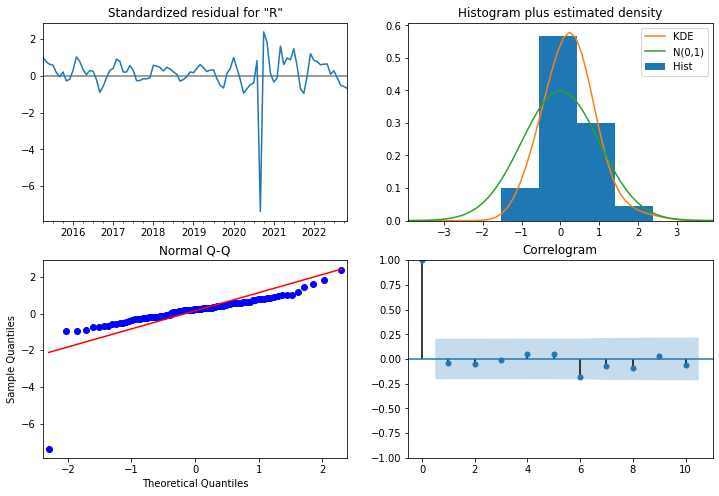

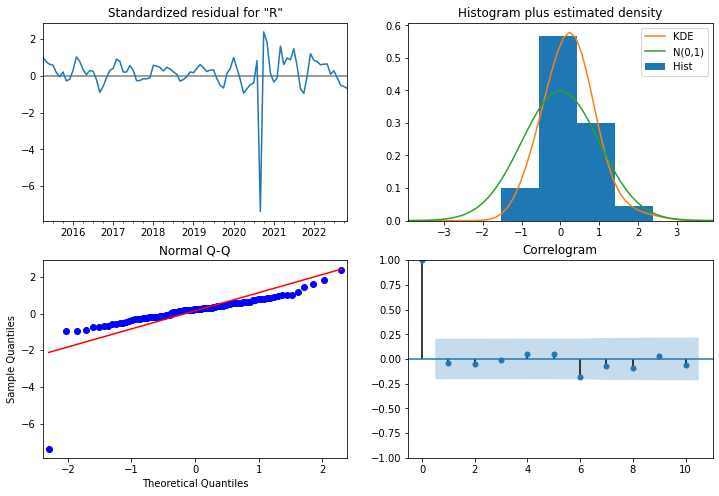

In [ ]:
# Residuals charts
arima_model_fit.plot_diagnostics(figsize=(12,8))

# Auto ARIMA

In [ ]:
pip install pmdarima

In [ ]:
# pmdarima.arima.auto_arima

from pmdarima.arima import auto_arima

# Rolling forecast

In [ ]:
# Evaluate an ARIMA model using a walk-forward validation

from sklearn.metrics import mean_squared_error
from math import sqrt

# Split into train and test sets
X = df['Rent_Index'].values

size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]

history = [x for x in train]

predictions = []

# Walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(3,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()

	pred_y = output[0]
	predictions.append(pred_y)

	obs_y = test[t]

	history.append(obs_y)

	print('Actual=%f, Predicted=%f' % (obs_y, pred_y))

Actual=2712.612069, Predicted=2705.400358
Actual=2714.698841, Predicted=2702.502772
Actual=2716.400271, Predicted=2707.507520
Actual=2750.545718, Predicted=2715.678611
Actual=2778.348713, Predicted=2758.185039
Actual=2821.116468, Predicted=2795.316320
Actual=2865.647399, Predicted=2842.569801
Actual=2923.142507, Predicted=2893.343622
Actual=2966.649926, Predicted=2957.908412
Actual=2985.476105, Predicted=3003.023893
Actual=2985.695720, Predicted=3009.680839
Actual=2985.495023, Predicted=2993.798869
Actual=2999.470964, Predicted=2986.112980
Actual=3013.767318, Predicted=3003.466475
Actual=3037.240807, Predicted=3022.544050
Actual=3063.347439, Predicted=3049.456749
Actual=3092.663578, Predicted=3079.578101
Actual=3123.904757, Predicted=3111.294911
Actual=3144.968002, Predicted=3144.582464
Actual=3166.525685, Predicted=3163.245094
Actual=3176.060028, Predicted=3181.635264
Actual=3172.722698, Predicted=3187.121633
Actual=3160.365782, Predicted=3175.537624
Actual=3137.586626, Predicted=3155

In [ ]:
auto_arima(test)

ARIMA(order=(3, 1, 0), scoring_args={}, suppress_warnings=True)

# Evaluation score

In [ ]:
# Evaluate forecasts accuracy
rmse = sqrt(mean_squared_error(test, predictions))
print(rmse)

16.883255438988453


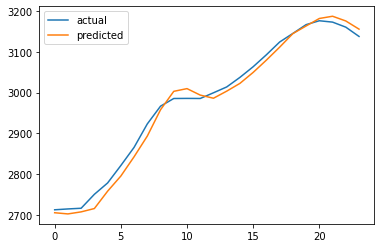

In [ ]:
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions)
plt.legend(labels=['actual','predicted'])
plt.show()

In [ ]:
df_test_predictions = pd.DataFrame({'test':test, 'prediction':predictions})
df_test_predictions

,test,prediction
0,2712.612069,2705.400358
1,2714.698841,2702.502772
2,2716.400271,2707.507520
3,2750.545718,2715.678611
4,2778.348713,2758.185039
5,2821.116468,2795.316320
6,2865.647399,2842.569801
7,2923.142507,2893.343622
8,2966.649926,2957.908412
9,2985.476105,3003.023893


In [ ]:
import plotly.graph_objects as go

In [ ]:
px.line(df_test_predictions, x=df_test_predictions.index, y='test')
px.line(df_test_predictions, x=df_test_predictions.index, y='prediction')
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_test_predictions.index, y=df_test_predictions['test'],
                    mode='lines',
                    name='actual'))
fig.add_trace(go.Scatter(x=df_test_predictions.index, y=df_test_predictions['prediction'],
                    mode='lines',
                    name='predicted'))
fig.show()
# fig_test_prediction.update_layout({"title": 'Evolution of the Rent index from March 2015 to November 2022',
#                    "xaxis": {"title":"Years"},
#                    "yaxis": {"title":"Rent index"},
#                    "showlegend": False})
#fig.add_annotation(x=1990, y=400,
 #           text="Text annotation with arrow",
  #          showarrow=True,
   #         arrowhead=1)
# fig_test_prediction.show()

# Exponential smoothing


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning:

The 'freq' argument in Timestamp is deprecated and will be removed in a future version.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



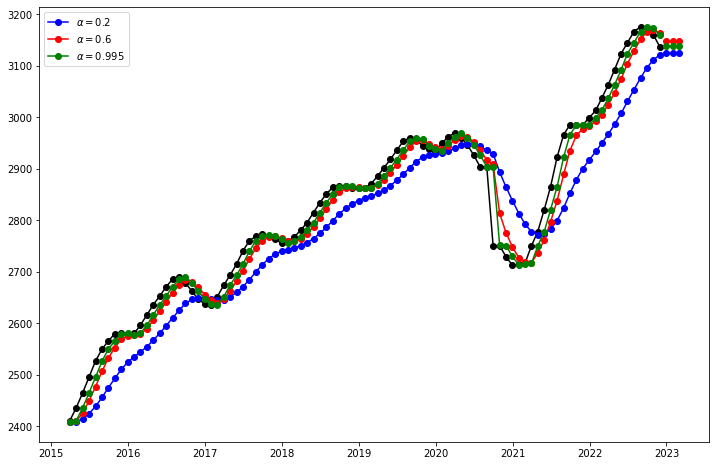

In [ ]:
fit1 = SimpleExpSmoothing(df['Rent_Index'], initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False
)
fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")
fit2 = SimpleExpSmoothing(df['Rent_Index'], initialization_method="heuristic").fit(
    smoothing_level=0.6, optimized=False
)
fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")
fit3 = SimpleExpSmoothing(df['Rent_Index'], initialization_method="estimated").fit()
fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

plt.figure(figsize=(12, 8))
plt.plot(df['Rent_Index'], marker="o", color="black")
plt.plot(fit1.fittedvalues, marker="o", color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, marker="o", color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, marker="o", color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

In [ ]:
statsmodels.tsa.holtwinters.ExponentialSmoothing(df['Rent_Index'])
# documentation : https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation



# Other try

In [ ]:
import pmdarima as pm
from pmdarima import model_selection
import numpy as np
from matplotlib import pyplot as plt

# #############################################################################
# Load the data and split it into separate pieces
train, test = model_selection.train_test_split(df, train_size=0.75)

# Fit a simple auto_arima model
arima = pm.auto_arima(train, 
                      suppress_warnings=True, maxiter=5,
                      seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.scatter(x, test, marker='x')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

ValueError: ignored

In [ ]:
test_size_percentage = 0.25
test_size = int(test_size_percentage * df.shape[0])
train_size_initial = df.shape[0] - test_size

train_set = df.iloc[:train_size_initial]
test_set = df.iloc[train_size_initial:]

# # len check
# # print(train_set.shape[0] + test_set.shape[0] == furniture.shape[0])

def arima_forecast(tme_sries):
  arima = ARIMA(tme_sries, order=(3, 1, 0)).fit()
  return arima.forecast().iloc[0]

evaluation_df = pd.DataFrame(range(0, test_size), columns = ['forecast'])
evaluation_df['test'] = list(test_set)
evaluation_df['forecast'] = evaluation_df['forecast']\
  .apply(lambda n: arima_forecast(df.iloc[:train_size_initial + n]))